# Multiclass-Perceptron

## 1. Implementing the multiclass perceptron and storing the history of the weight vectors. 

In [43]:
import numpy as np

class MulticlassPerceptron:

    def __init__(self, eta=0.01, tau_max=200000, epsilon=0.005, random_state=None):
        self.eta = eta   # learning rate
        self.tau_max = tau_max   # max number of iterations
        self.epsilon = epsilon   # tolerable error
        self.random_state = random_state

    def fit(self, x, y):
        RNG = np.random.default_rng(self.random_state)
        n, p = x.shape
        k = np.unique(y).size # number of classes

        self.w_trace_ = np.empty((self.tau_max, k, p))     # trace of weights while training
        self.xy_idx_trace_ = np.empty((self.tau_max, k), int) # trace of the indices of the training points under consideration.
        
        # initialisatising counter and weights
        tau = 0 
        self.w_ = RNG.normal(size=(k, p)) 
        terminate = False
        while not (terminate or (np.argmax(self.predict(x),axis=1) != y).mean() < self.epsilon):
            # random selecting training data
            order = RNG.choice(np.arange(n),size = n ,replace = False)
            for i in range(n):
                y_hat = self.predict(x[order][i]) 
                y_hat = np.argmax(y_hat) # prediction for a particular class
                if y_hat != y[order][i]: # condition for updating the weights
                    self.w_[y_hat] = self.w_[y_hat] - self.eta * x[order][i]
                    self.w_[y[order][i]] = self.w_[y[order][i]] + self.eta * x[order][i]
                
                self.w_trace_[tau+1] = self.w_
                self.xy_idx_trace_[tau] = order[i]

                tau +=1
                if tau == self.tau_max-1:
                    terminate = True
                    break
        
        
        #print(tau)
        self.w_trace_ = self.w_trace_[:tau] 
        self.xy_idx_trace_ = self.xy_idx_trace_[:tau-1]

        return self

    def predict(self, x):
        return x.dot(self.w_.T)


## 2. Evaluating the algorithm using the digits dataset provided through the function load digits in sklearn.datasets

In [44]:
# loading the dataset
from sklearn.datasets import load_digits

digits = load_digits()

In [45]:
import pandas as pd

In [46]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target

In [47]:
df.shape

(1797, 65)

In [48]:
# train-test split
from sklearn.metrics import mean_squared_error, make_scorer, accuracy_score, zero_one_loss, log_loss
from sklearn.model_selection import train_test_split

# Assume you have a dataset X and its corresponding labels y
X_train_per, X_test_per, y_train_per, y_test_per = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)


In [49]:
# generating different models for different learning rates and storing them in a list
eta_list = [0.01,0.1,0.9]
model_list = []

for i in eta_list:
    mPerceptron = MulticlassPerceptron(eta = i, random_state=0)
    model_list.append(mPerceptron.fit(X_train_per,y_train_per))

In [50]:
# train and test accuracies for different learning rates
for i in range(len(model_list)):
    
    train_accuracy = accuracy_score(np.argmax(model_list[i].predict(X_train_per),axis=1), y_train_per)
    test_accuracy = accuracy_score(np.argmax(model_list[i].predict(X_test_per),axis=1), y_test_per)

    print(f'Train accuracy for {eta_list[i]}: {train_accuracy}')
    print(f'Test accuracy for {eta_list[i]}: {test_accuracy}')
    print('*'*40)

Train accuracy for 0.01: 0.9958246346555324
Test accuracy for 0.01: 0.9583333333333334
****************************************
Train accuracy for 0.1: 0.9951287404314544
Test accuracy for 0.1: 0.9666666666666667
****************************************
Train accuracy for 0.9: 0.9965205288796103
Test accuracy for 0.9: 0.9694444444444444
****************************************


## 3. For each learning rate, drawing a plot of the training and test error as the number of iterations of the inner loop increases. Explaing how the errors behave as the training data increases and how this is effected by the learning rate.

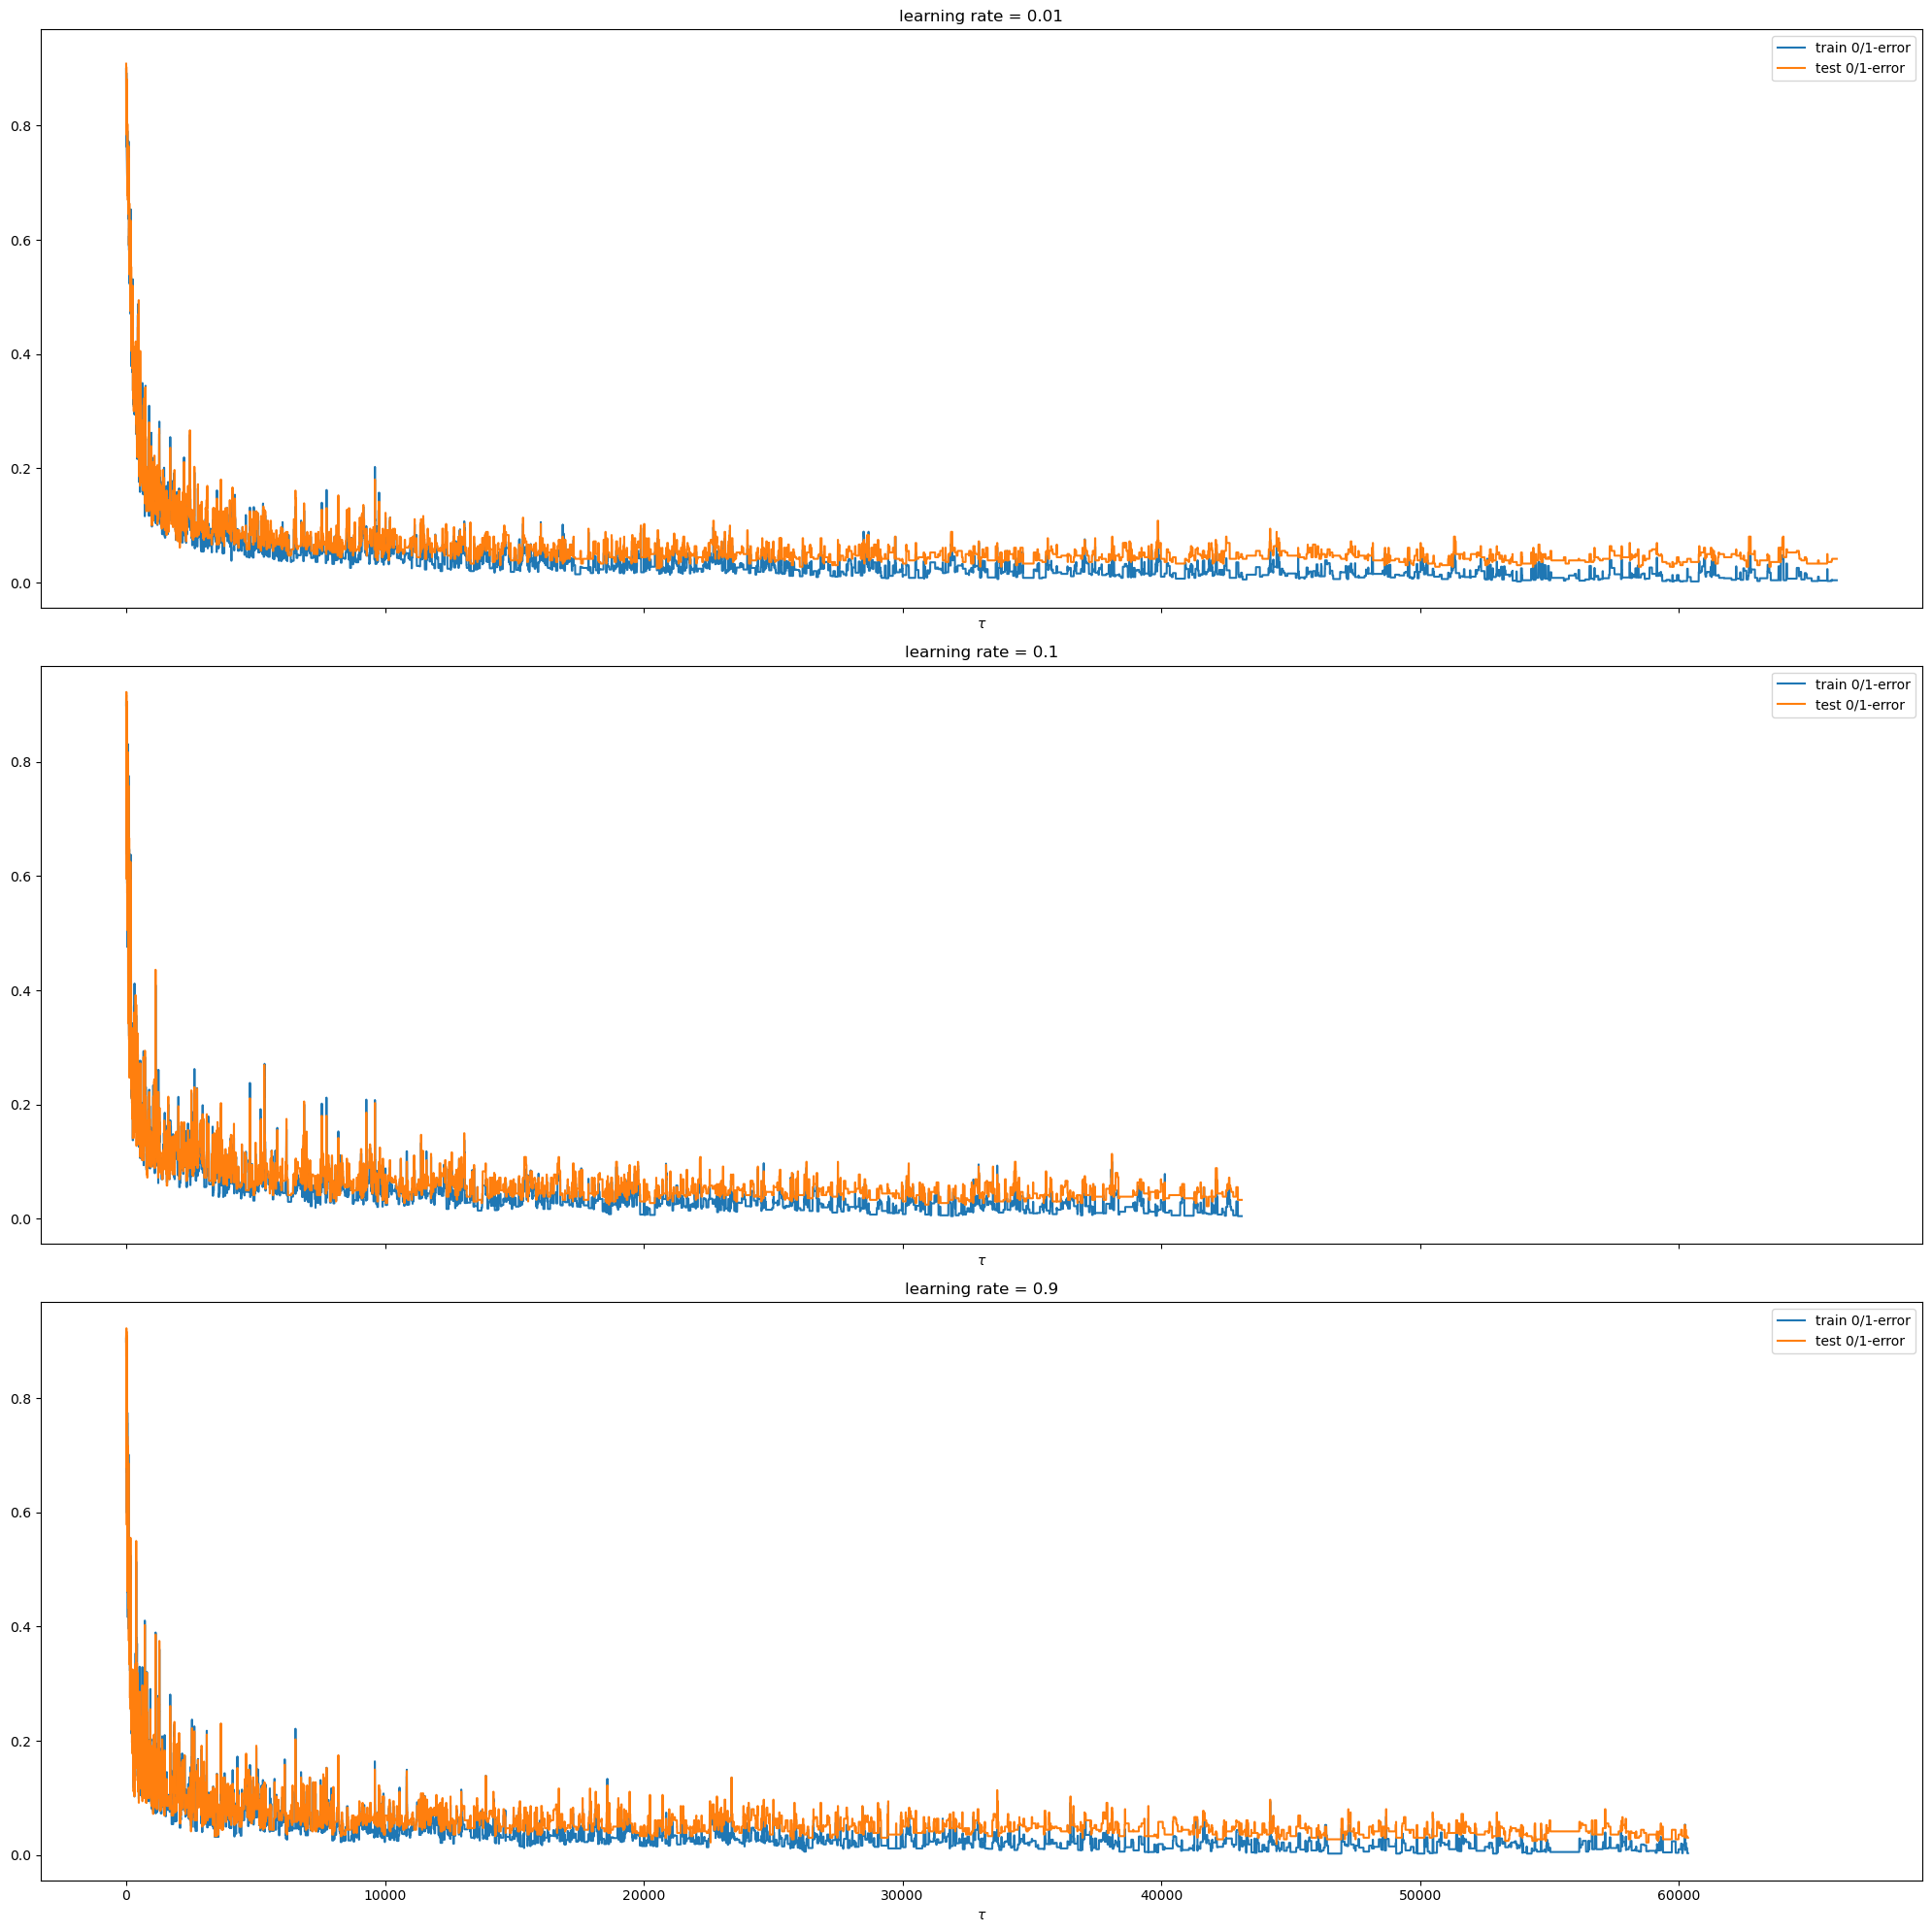

In [51]:
# plotting errors for each model
_ , ax = plt.subplots(3, 1, figsize=(20,20), sharex=True, sharey=True, tight_layout=True)

for i,j in enumerate(model_list):
    mperceptron = model_list[i]
    test_errors = np.array([zero_one_loss((np.argmax(X_test_per.dot(w.T), axis = 1)), y_test_per) for w in mperceptron.w_trace_])
    train_errors = np.array([zero_one_loss((np.argmax(X_train_per.dot(w.T), axis = 1)), y_train_per) for w in mperceptron.w_trace_])
    ax[i].set_title(f'learning rate = {eta_list[i]}')
    ax[i].plot(train_errors, label='train 0/1-error')
    ax[i].plot(test_errors, label='test 0/1-error')
    ax[i].set_xlabel(r'$\tau$')
    ax[i].legend()
    
plt.show()

For each model, as the number of iterations increase, both the test and train error go down untill they fall below the defined threshold value. The most number of iterations take place when learning rate is 0.01 and the model take a larger number of iterations to converge. When the learning rate is 0.9, we face the off-shoot problem as the model fluctuates between low and high values between iterations, thus taking large number of iterations to converge. The optimum learning rate here is 0.1.

# 